### Importing the libraries and read the data.

In [79]:
import pandas as pd
import numpy as np
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [80]:
df = pd.read_csv( "Smarket.csv" )

In [83]:
df.head(10)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
5,2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up
6,2001,1.392,0.213,0.614,-0.623,1.032,1.4450,-0.403,Down
7,2001,-0.403,1.392,0.213,0.614,-0.623,1.4078,0.027,Up
8,2001,0.027,-0.403,1.392,0.213,0.614,1.1640,1.303,Up
9,2001,1.303,0.027,-0.403,1.392,0.213,1.2326,0.287,Up


### Target variable is "Direction".

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
Year         1250 non-null int64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


In [86]:
#df[df.Direction == "Up"]["Direction_DUM"] =1
df['Direction_DUM'] = df.Direction.map( lambda x: 1 if x == "Up" else 0)

### Adding a column which represents the "Direction column" with Up as "1" and Down as "0"

In [108]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_DUM
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,1


In [109]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_DUM
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095,0.074608
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155,-0.039757
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250,-0.024081
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448,0.006132
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900,0.004215
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860,0.005423
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592,0.022951
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000,0.730563
Direction_DUM,0.074608,-0.039757,-0.024081,0.006132,0.004215,0.005423,0.022951,0.730563,1.000000


### Unselecting the "Today" column which is highly correlated with the target variable.
### Unselecting the Target variables and selecting the remaining columns as predictor variables.

In [53]:
var = list(df.columns)
var.remove( 'Direction' )
var.remove( 'Direction_DUM' )
var

['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']

In [110]:
df_complete = df[var]

In [111]:
df_complete.head().T

,0,1,2,3,4
Year,2001.0000,2001.0000,2001.0000,2001.000,2001.0000
Lag1,0.3810,0.9590,1.0320,-0.623,0.6140
Lag2,-0.1920,0.3810,0.9590,1.032,-0.6230
Lag3,-2.6240,-0.1920,0.3810,0.959,1.0320
Lag4,-1.0550,-2.6240,-0.1920,0.381,0.9590
Lag5,5.0100,-1.0550,-2.6240,-0.192,0.3810
Volume,1.1913,1.2965,1.4112,1.276,1.2057


### Assigning the response variable to y and predictor variables to x. 

In [117]:
y = df.Direction_DUM

In [118]:
x = df_complete

### Splitting the data into Train and Test data using split function with propotion 70:30 respectively

In [119]:
from sklearn.cross_validation import train_test_split

In [115]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3)

### Fitting Binary choice logit model on x_train and y_train

In [62]:
import statsmodels.api as sm

In [63]:
logit = sm.Logit( y_train, sm.add_constant( x_train ) )

In [65]:
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.688110
         Iterations 5


In [66]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Direction_DUM   No. Observations:                  875
Model:                          Logit   Df Residuals:                      867
Method:                           MLE   Df Model:                            7
Date:                Thu, 07 Jun 2018   Pseudo R-squ.:                0.006248
Time:                        18:13:01   Log-Likelihood:                -602.10
converged:                       True   LL-Null:                       -605.88
                                        LLR p-value:                    0.3720
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -251.0198    116.529     -2.154      0.031    -479.413     -22.627
Year           0.1254      0.058      2.152      0.031       0.011       0.240
Lag1          -0.0550      0.061     -0.907      0.365      -0.174       0.064
Lag2          -0.0442      0.061     -0.727      0.468      -0.164       0.075
Lag3           0.0131      0.060      0.220      0.826      -0.104       0.130
Lag4          -0.0011      0.061     -0.018      0.985      -0.120       0.118
Lag5           0.0091      0.059      0.154      0.877      -0.106       0.124
Volume        -0.0295      0.231     -0.128      0.898      -0.482       0.423
==============================================================================
"""

### User defined function to get variables whose p_values are less than 0.05

In [67]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [68]:
significant_vars = get_significant_vars( lg )

In [69]:
significant_vars

['const', 'Year']

### Getting prediction probability based on y_test data and predicted Direction values

In [70]:
from sklearn import metrics

In [71]:
def get_predictions( y_test, model ):
    y_pred_df = pd.DataFrame( { 'actual': y_test,
                               "predicted_prob": model.predict( sm.add_constant( x_test ) ) } )
    return y_pred_df

In [72]:
y_pred_df = get_predictions( y_test, lg )

In [73]:
y_pred_df[0:10]

,actual,predicted_prob
189,1,0.471331
1209,1,0.576099
764,1,0.580386
974,0,0.549592
282,1,0.493628
605,1,0.488575
388,0,0.481886
441,0,0.417944
881,0,0.561371
1011,0,0.601498


In [123]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0)

In [75]:
y_pred_df[0:10]

,actual,predicted_prob,predicted
189,1,0.471331,0
1209,1,0.576099,1
764,1,0.580386,1
974,0,0.549592,1
282,1,0.493628,0
605,1,0.488575,0
388,0,0.481886,0
441,0,0.417944,0
881,0,0.561371,1
1011,0,0.601498,1


### Heatmap representing the confusion matrix and calculating the accuracy of model between actual and predited values.
### Focus is on reducing the Actual "Up" and Predicted "Down" cell.

In [76]:
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib inline

In [155]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Up", "Down"] , yticklabels = ["Up", "Down"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

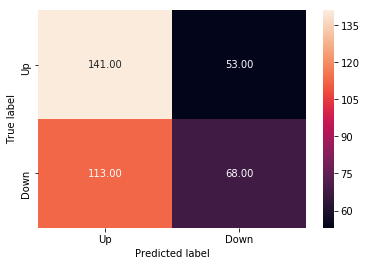

In [156]:
draw_cm( y_pred_df.actual, y_pred_df.predicted )

In [88]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

Total Accuracy :  0.56


In [89]:
print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted ), 2 ) )

Precision :  0.56


In [90]:
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted ), 2 ) )

Recall :  0.73


In [91]:
cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [1,0] )

In [92]:
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])

In [93]:
print('Sensitivity : ', round( sensitivity, 2) )

Sensitivity :  0.73


In [94]:
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Specificity :  0.38


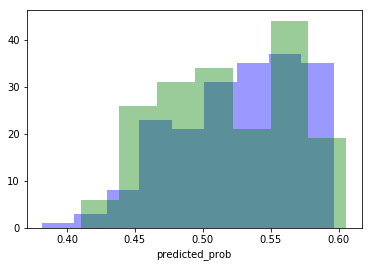

In [95]:
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], kde=False, color = 'b' )
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], kde=False, color = 'g' )

### Plotting ROC curve to find the ability of the model to relate the actual_target values and predicted probabilities.

In [96]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob  )
round( float( auc_score ), 2 )

0.55

In [97]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

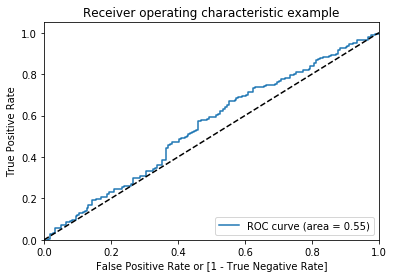

In [98]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob )

In [99]:
thresholds[0:10]

array([1.6056907 , 0.6056907 , 0.60149848, 0.59639612, 0.59526461,
       0.59372314, 0.59295244, 0.59290312, 0.59257502, 0.59224863])

In [100]:
fpr[0:10]

array([0.        , 0.00552486, 0.01104972, 0.01104972, 0.01657459,
       0.01657459, 0.01657459, 0.01657459, 0.01657459, 0.02209945])

In [101]:
tpr[0:10]

array([0.        , 0.        , 0.        , 0.00515464, 0.00515464,
       0.01030928, 0.01546392, 0.02061856, 0.0257732 , 0.0257732 ])

###  Using different threshold to check if the model can be improved by reducing the interested error.

In [160]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.48 else 0)

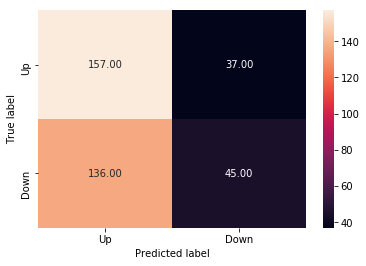

In [161]:
draw_cm( y_pred_df.actual, y_pred_df.predicted_new )

In [154]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted_new ), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted_new ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted_new ), 2 ) )

cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted_new, [1,0] )

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Total Accuracy :  0.53
Precision :  0.53
Recall :  0.8
Sensitivity :  0.81
Specificity :  0.25


### Total accuracy of the model is 53%. As the threshold decreases, the actual "Down" and  predicted "Up" increases faster than the actual "Up" and predicted "Down". For threshold increasing it is vice-versa.